In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import rpy2.rinterface_lib.callbacks
import logging
import scrublet as scr
from rpy2.robjects import pandas2ri
import anndata2ri

In [2]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.19.5 scipy==1.6.3 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0


In [3]:
%%R
# Load libraries from correct lib Paths for my environment - ignore this!
.libPaths("/home/spuccio/anaconda3/envs/singlecell/lib/R/library/")

library(clustree)


In [4]:
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [5]:
adata = sc.read("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/DESC_obj_complete.h5ad")

In [15]:
adata2 = sc.read("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/DESC_input.h5ad")

In [6]:
adata.X

array([[-0.02503018, -0.27712697, -0.04891158, ..., -0.2849295 ,
        -0.08459163,  1.0434302 ],
       [-0.02503018, -0.27712697, -0.04891158, ..., -0.2849295 ,
        -0.08459163, -0.45496988],
       [-0.02503018, -0.27712697, -0.04891158, ..., -0.2849295 ,
        -0.08459163,  1.0434302 ],
       ...,
       [-0.02503018, -0.27712697, -0.04891158, ..., -0.2849295 ,
        -0.08459163, -0.45496988],
       [-0.02503018, -0.27712697, -0.04891158, ..., -0.2849295 ,
         4.239531  , -0.45496988],
       [-0.02503018, -0.27712697, -0.04891158, ..., -0.2849295 ,
        -0.08459163, -0.45496988]], dtype=float32)

In [51]:
adata.obs

,CellId,CellFromTumor,PatientNumber,TumorType,TumorSite,CellType,n_genes_by_counts,total_counts,batch,desc_0.4,desc_0.5,desc_0.6,desc_0.8,desc_1.0
scrEXT001_AAACCTGTCGTCCAGG-0,scrEXT001_AAACCTGTCGTCCAGG,Tumor_Involved,PTZ_31,CRC,Colon,T_cell,1297,3351.0,0,6,6,7,8,10
scrEXT001_AAACGGGTCGCATGGC-0,scrEXT001_AAACGGGTCGCATGGC,Tumor_Involved,PTZ_31,CRC,Colon,T_cell,741,1565.0,0,6,6,7,8,10
scrEXT001_AAAGATGAGAATTCCC-0,scrEXT001_AAAGATGAGAATTCCC,Tumor_Involved,PTZ_31,CRC,Colon,T_cell,663,1495.0,0,6,6,7,8,10
scrEXT001_AAATGCCCAGCGAACA-0,scrEXT001_AAATGCCCAGCGAACA,Tumor_Involved,PTZ_31,CRC,Colon,T_cell,1045,2493.0,0,6,6,7,8,10
scrEXT001_AACCATGCATTAACCG-0,scrEXT001_AACCATGCATTAACCG,Tumor_Involved,PTZ_31,CRC,Colon,T_cell,1168,3761.0,0,6,6,7,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCAGTGCAT-1-29-1,TTTGTCATCAGTGCAT-1,IBD_UnInvolved,Ptz_1813,IBD,LP,Uninvolved,471,1322.0,1,2,2,3,6,5
TTTGTCATCGATGAGG-1-29-1,TTTGTCATCGATGAGG-1,IBD_UnInvolved,Ptz_1813,IBD,LP,Uninvolved,1506,6317.0,1,2,2,3,7,8
TTTGTCATCGTACGGC-1-29-1,TTTGTCATCGTACGGC-1,IBD_UnInvolved,Ptz_1813,IBD,LP,Uninvolved,826,3145.0,1,2,2,3,6,5
TTTGTCATCTACTTAC-1-29-1,TTTGTCATCTACTTAC-1,IBD_UnInvolved,Ptz_1813,IBD,LP,Uninvolved,1060,2644.0,1,2,2,3,7,8


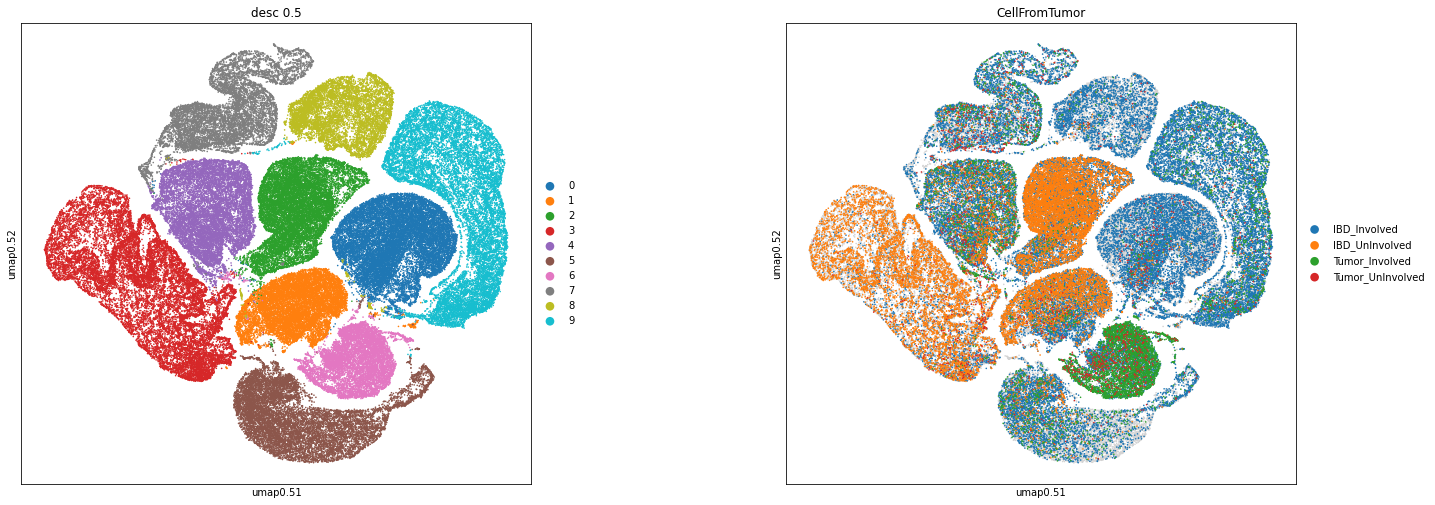

In [52]:
plt.rcParams['figure.figsize']=(8,8)
sc.pl.scatter(adata,basis="umap0.5",color=['desc_0.5',"CellFromTumor"],size=10)

In [53]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:02)


In [54]:
sc.pp.log1p(adata)

/home/spuccio/anaconda3/envs/singlecell/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:354: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(X, out=X)
/home/spuccio/anaconda3/envs/singlecell/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:354: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


In [55]:
sc.pp.scale(adata, max_value=3,zero_center=True)

In [34]:
adata.raw = adata

In [35]:
adata

AnnData object with n_obs × n_vars = 116906 × 16323
    obs: 'CellId', 'CellFromTumor', 'PatientNumber', 'TumorType', 'TumorSite', 'CellType', 'n_genes_by_counts', 'total_counts', 'batch', 'desc_0.4', 'desc_0.5', 'desc_0.6', 'desc_0.8', 'desc_1.0'
    var: 'mean', 'std'
    uns: 'TumorSite_colors', 'desc_0.5_colors', 'desc_0.8_colors', 'CellFromTumor_colors', 'log1p'
    obsm: 'X_Embeded_z0.4', 'X_Embeded_z0.5', 'X_Embeded_z0.6', 'X_Embeded_z0.8', 'X_Embeded_z1.0', 'X_umap', 'X_umap0.4', 'X_umap0.5', 'X_umap0.6', 'X_umap0.8', 'X_umap1.0'

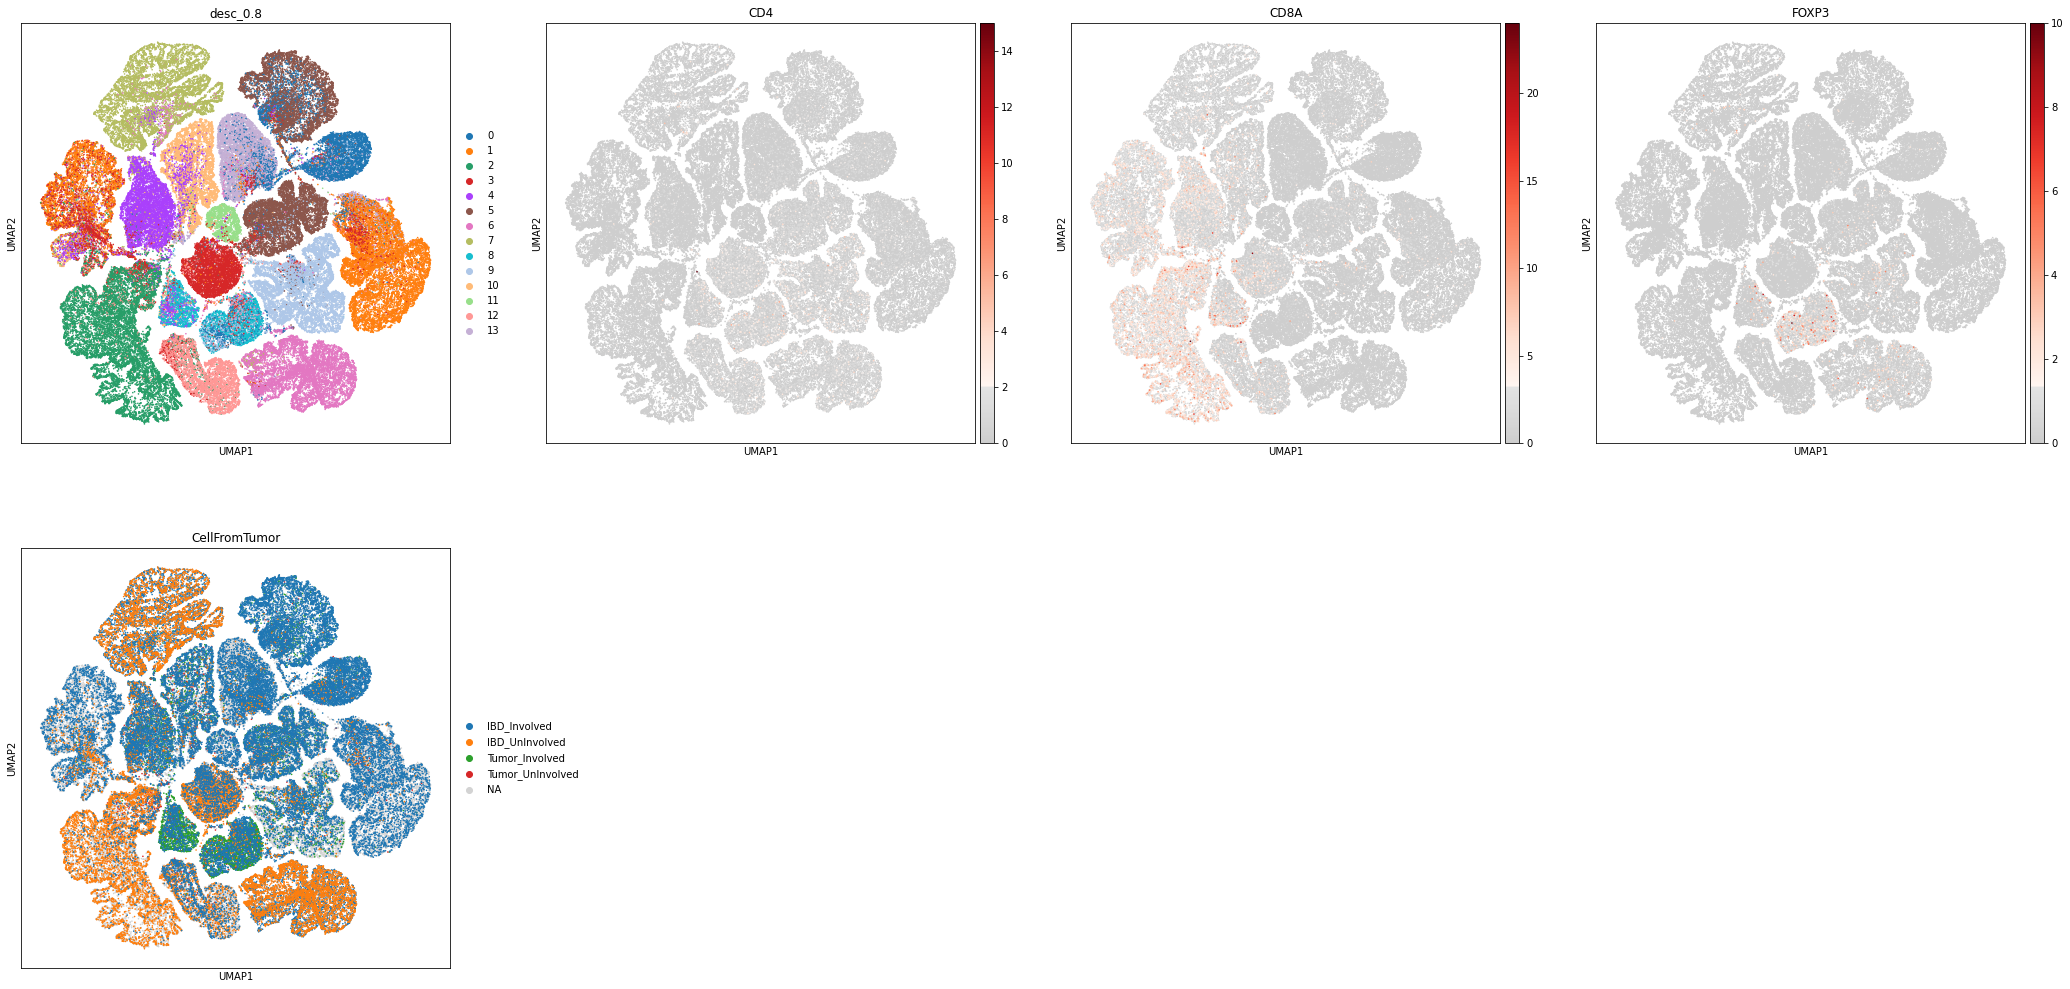

In [7]:
sc.pl.umap(adata, color=['desc_0.8','CD4','CD8A','FOXP3','CellFromTumor'],s=10,color_map=mymap,neighbors_key="Embeded_z0.8")


In [37]:
adata.obs['CellFromTumor'].value_counts()

IBD_Involved        41560
IBD_UnInvolved      17233
Tumor_Involved       7138
Tumor_UnInvolved     1650
Name: CellFromTumor, dtype: int64

In [42]:
adata.obs['desc_0.8'].isna().value_counts()

False    116906
Name: desc_0.8, dtype: int64

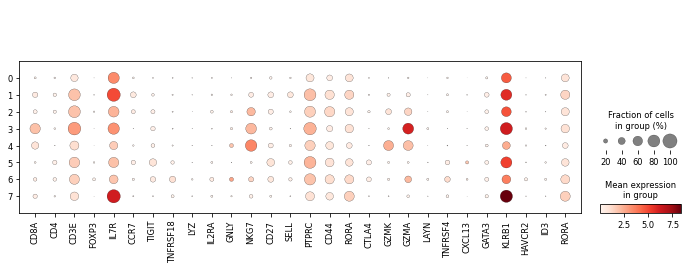

In [27]:
sc.pl.dotplot(adata, ['CD8A','CD4','CD3E','FOXP3','IL7R','CCR7','TIGIT','TNFRSF18','LYZ','IL2RA','GNLY','NKG7','CD27','SELL','PTPRC','CD44','RORA','CTLA4','GZMK','GZMA','LAYN','TNFRSF4','CXCL13','GATA3','KLRB1','HAVCR2','ID3','RORA'], groupby='desc_0.4');



In [21]:
adata[adata.obs['desc_0.8'].isin([8,9,5,6]),:].obs['CellFromTumor'].value_counts(normalize=True)

IBD_Involved        0.577599
Tumor_Involved      0.205149
IBD_UnInvolved      0.200530
Tumor_UnInvolved    0.016722
Name: CellFromTumor, dtype: float64

In [22]:
adata[adata.obs['desc_0.8'].isin([8,9,5,6]),:].obs['CellFromTumor'].value_counts(normalize=False)

IBD_Involved        13506
Tumor_Involved       4797
IBD_UnInvolved       4689
Tumor_UnInvolved      391
Name: CellFromTumor, dtype: int64

In [16]:
adata[adata.obs['desc_0.5'].isin([8,9,5,6]),:].write("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/CD4_dirty.h5ad")

In [23]:
adata3 = adata2[adata2.obs.index.isin(adata[adata.obs['desc_0.5'].isin([8,9,5,6]),:].obs.index),:]

In [24]:
adata3

View of AnnData object with n_obs × n_vars = 40826 × 16323
    obs: 'CellId', 'CellFromTumor', 'PatientNumber', 'TumorType', 'TumorSite', 'CellType', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'dataset', 'batch', 'percent_mt2', 'n_counts', 'n_genes', 'desc_0.4', 'desc_0.5', 'desc_0.6', 'desc_0.8'

In [26]:
adata3.write("/mnt/lugli/spuccio/SP028_Autoimmunity/Cariplo/IBD_counts/h5files/CD4_clean.h5ad") 

/home/spuccio/anaconda3/envs/singlecell/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'desc_0.4' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'desc_0.5' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'desc_0.6' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'desc_0.8' as categorical
